## Number of artifacts by project
NOTE: Please insert the password in order to access to the database

In [1]:
import getpass

password = getpass.getpass('Enter password for the mongodb database:')



Enter password for the mongodb database: ············


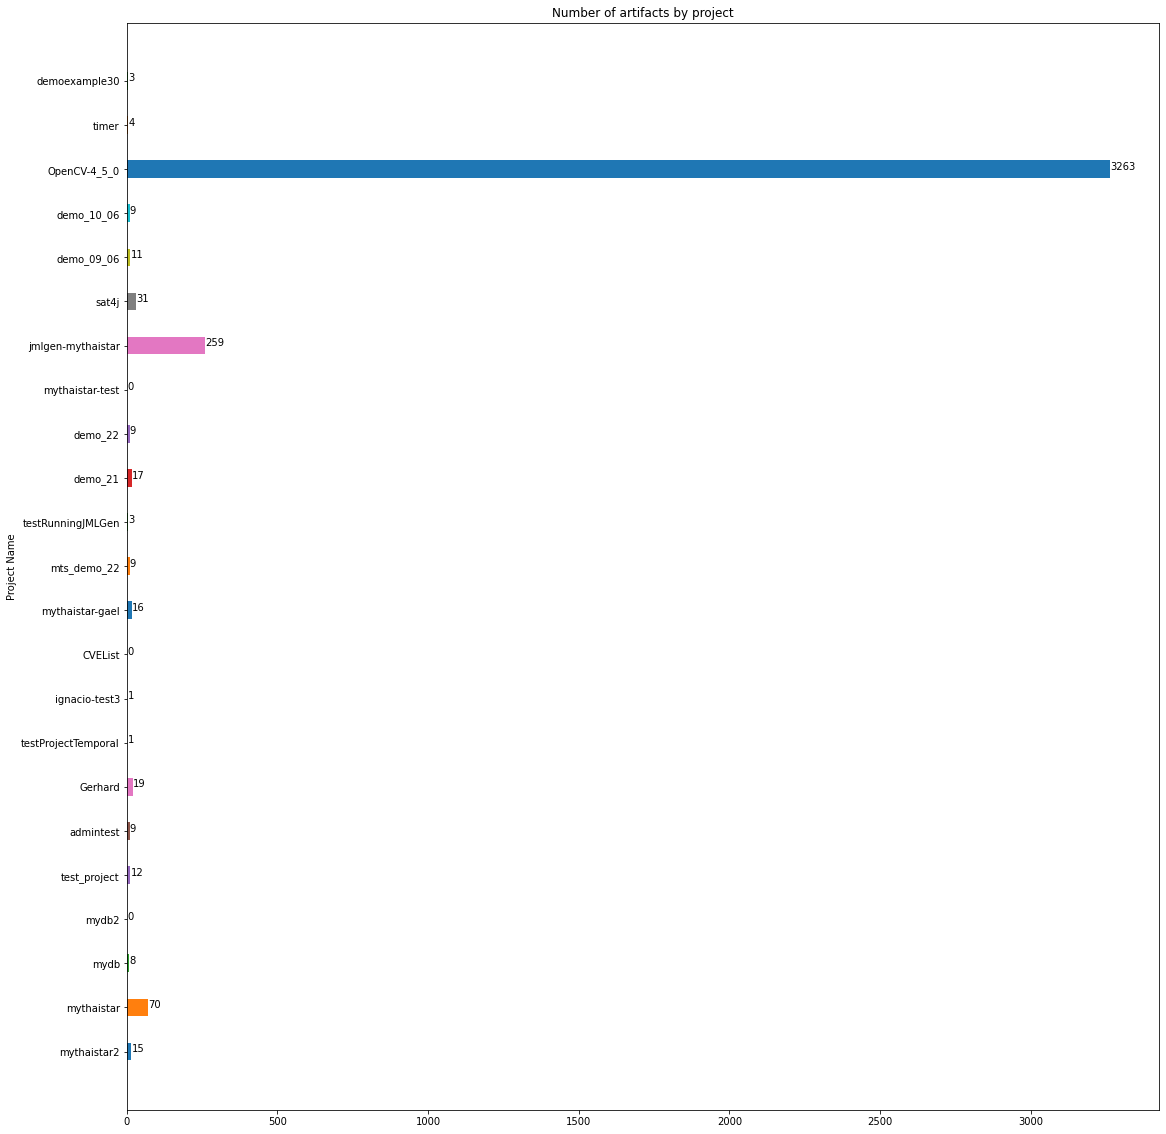

In [2]:
from pymongo import MongoClient
from decoderpkm import GetConn, GetConf
from IPython.display import HTML, display
import pymongo
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np
from decoderpkm import GetConn, GetConf

client = GetConn(password)

db = client['pkm']

projects = db.Projects

projectNames = []

collectionNames = [ 'Annotations', 'commentsjava', 'Documentation',
                    'RawSourcecode', 'sourcecodeJava', 'RawUML', 'UMLClasses', 
                    'TESTARStateModels', 'TESTARTestResults', 'TraceabilityMatrix']

collectionLabels = ['Annotations', 'Java Comments', 'Documentation',
                    'Raw Source Code', 'Java Source', 'Raw UML Diagramas', 'UML Classes',
                    'Testar Test Results', 'Testar State Models', 'Traceability Matrix']

counts = []

for project in projects.find({}):
    projectNames.append(project['name'])
    
    i = 0
    total = 0
    for col in collectionNames:
        count = client[project['name']][col].count_documents({})
        total = total + count
        i = i + 1
    counts.append(total)
    
y = np.arange(len(projectNames))

width = 1  # the width of the bars
fig, ax = plt.subplots()

i = 0
for projectName in projectNames:
    ax.barh(i, counts[i], height=0.4, label=projectName)
    # number value on the top of the bar:
    ax.text(counts[i]+1, i, str(counts[i]))
    i = i + 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Project Name')
ax.set_title('Number of artifacts by project')
ax.set_yticks(y)
ax.set_yticklabels(projectNames)
# ax.legend()

fig.set_size_inches(18.5, 20)

plt.show()
